In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [53]:
refImg = cv2.imread("images/form.jpg", cv2.IMREAD_COLOR)
refImg = cv2.cvtColor(refImg, cv2.COLOR_BGR2RGB)
scnImg = cv2.imread("images/scanned-form.jpg", cv2.IMREAD_COLOR)
scnImg = cv2.cvtColor(scnImg, cv2.COLOR_BGR2RGB)

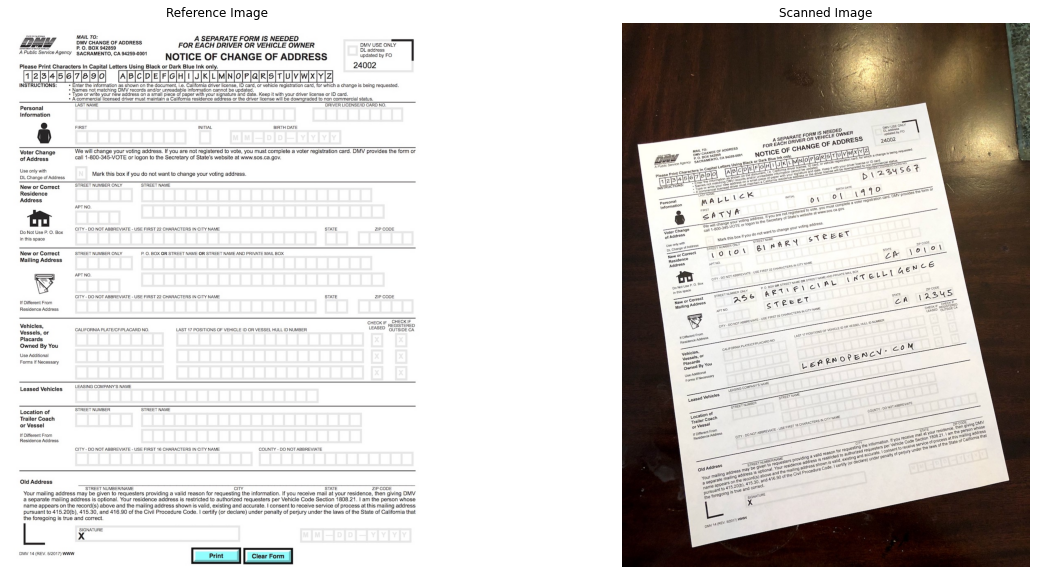

In [54]:
plt.figure(figsize=[20,10])
plt.subplot(121)
plt.title("Reference Image")
plt.axis('off')
plt.imshow(refImg)
plt.subplot(122)
plt.title("Scanned Image")
plt.axis('off')
plt.imshow(scnImg)


In [55]:
refGray = cv2.cvtColor(refImg, cv2.COLOR_RGB2GRAY)
scnGray = cv2.cvtColor(scnImg, cv2.COLOR_RGB2GRAY)

MAX_FEATURES = 500
orb = cv2.ORB_create(MAX_FEATURES)
keypoints1, descriptiors1 = orb.detectAndCompute(refGray, None)
keypoints2, descriptiors2 = orb.detectAndCompute(scnGray, None)

refDisplay = cv2.drawKeypoints(refImg, keypoints1, np.array([]), [255, 0, 0], cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
scnDisplay = cv2.drawKeypoints(scnImg, keypoints2, np.array([]), [255, 0, 0], cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

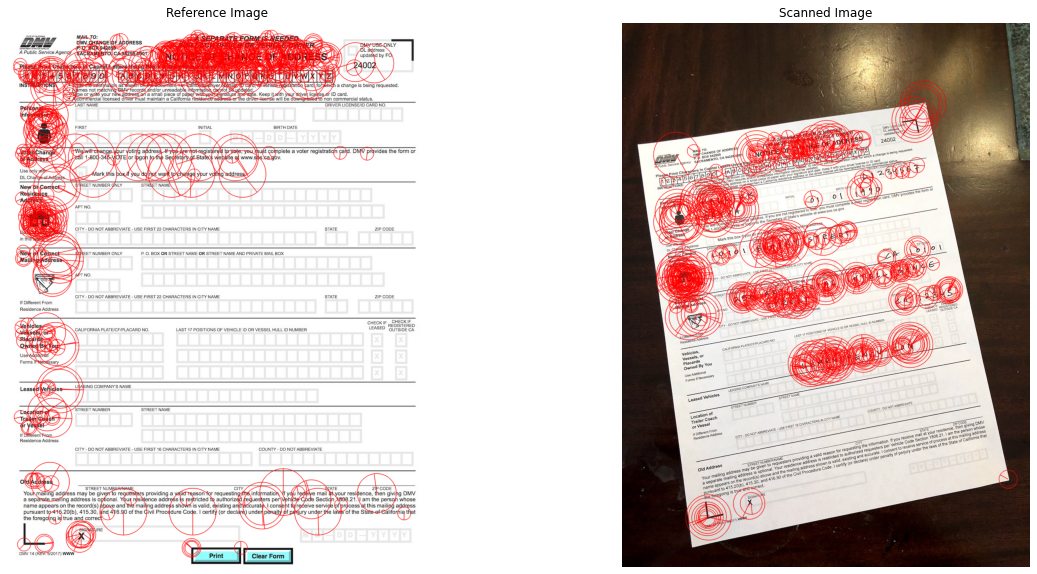

In [56]:
plt.figure(figsize=[20,10])
plt.subplot(121)
plt.title("Reference Image")
plt.axis('off')
plt.imshow(refDisplay)
plt.subplot(122)
plt.title("Scanned Image")
plt.axis('off')
plt.imshow(scnDisplay)


In [57]:
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(descriptiors1, descriptiors2, None)

matches= sorted(matches, key = lambda x : x.distance)

numGoodMatches = int(len(matches) * 0.1)
matches = matches[:numGoodMatches]

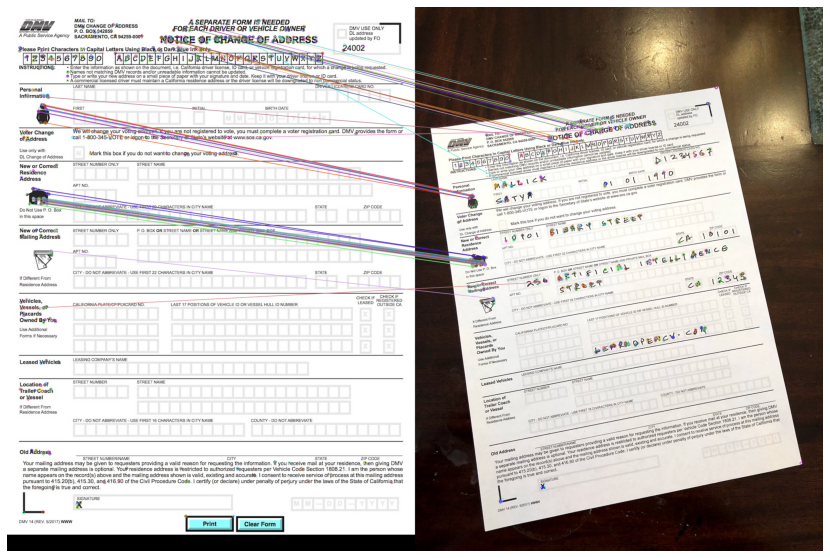

In [61]:
imgMatches = cv2.drawMatches(refImg, keypoints1, scnImg, keypoints2, matches, None)
plt.figure(figsize=[40, 10])
plt.axis('off')
plt.imshow(imgMatches)

In [71]:
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
  points1[i, :] = keypoints1[match.queryIdx].pt
  points2[i, :] = keypoints2[match.trainIdx].pt

h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)

Text(0.5, 1.0, 'Scanned')

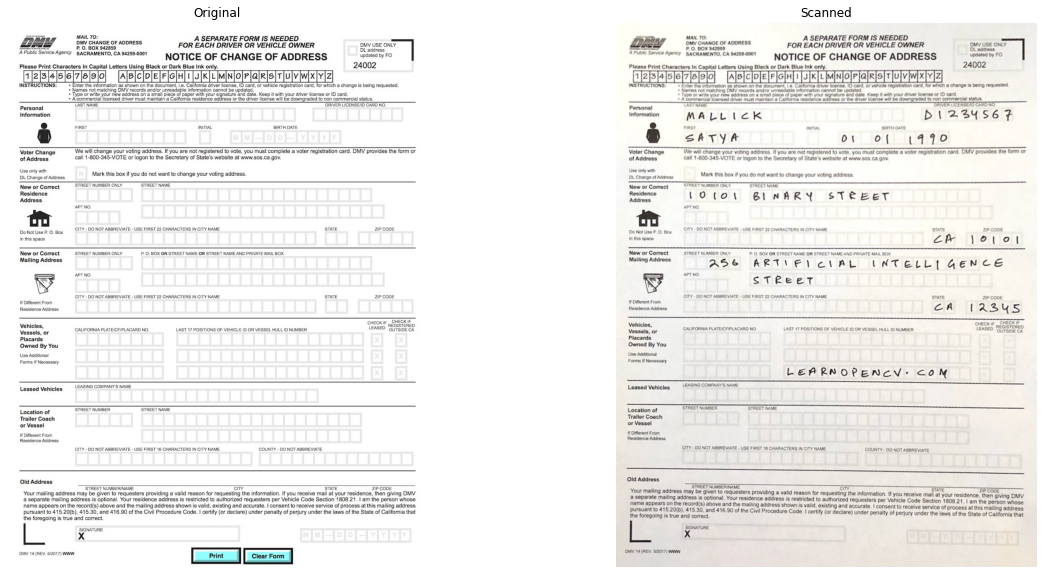

In [72]:
height, width, channels = refImg.shape

scnImg_reg = cv2.warpPerspective(scnImg, h, (width, height))

plt.figure(figsize=[20, 10])
plt.subplot(121)
plt.imshow(refImg)
plt.axis('off')
plt.title('Original')
plt.subplot(122)
plt.imshow(scnImg_reg)
plt.axis('off')
plt.title('Scanned')
